In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated

In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:
datafile = directory +'/aerosol_data/phase_data_noise_small.hdf5'

In [5]:
model_name = 'forward_model'


In [6]:
model_dir = directory +'/aerosol_results/models_phase_noise_small'

In [7]:
#plot_dir = f'../plots/models/{model_name}'
plot_dir = directory +'/aerosol_results/forward_model_phase_noise_small0/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [8]:
model_name

'forward_model'

# Load the model and the data

In [9]:
custom_objects = {
    'AdjustedRSquared': AdjustedRSquared,
}

kwargs = {
    'custom_objects': custom_objects,
    'compile': False,
}

surr = KerasSurrogate.load(model_dir, model_name, model_kwargs=kwargs)
#import tensorflow as tf
#tf.keras.backend.set_floatx('float32')
#surr = KerasSurrogate.load(model_dir, model_name)

In [10]:
dir(surr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_surrogate',
 '_fit_model',
 '_load_model',
 '_model',
 '_name',
 '_predict_model',
 '_save_model',
 '_version',
 'details',
 'fit',
 'load',
 'model',
 'name',
 'predict',
 'preprocessor_x',
 'preprocessor_y',
 'save',
 'version']

In [11]:
dvar = pd.read_hdf(datafile, key='dvar')
qoi = pd.read_hdf(datafile, key='qoi')

n_in = dvar.shape[1]

dvar_trainval, dvar_test, qoi_trainval, qoi_test = train_test_split(dvar,
                                                                    qoi,
                                                                    test_size=0.2)
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

dvar_trainval.reset_index(drop=True, inplace=True)
qoi_trainval.reset_index(drop=True, inplace=True)

kf = KFold(n_splits=5, random_state=76, shuffle=True)

train_ind, val_ind = next(kf.split(dvar_trainval))

dvar_train = dvar_trainval.values[train_ind]
dvar_val = dvar_trainval.values[val_ind]
qoi_train = qoi_trainval.values[train_ind]
qoi_val = qoi_trainval.values[val_ind]

In [12]:
dvar

label_GMR  label_GSD       label_N  label_RI_n  label_RI_k 
0            0.1        1.9  1.000000e-08        1.53     0.079245
1            0.5        2.0  1.000000e-08        1.43     0.001991
2            0.9        1.7  1.000000e-08        1.42     0.001256
3            1.9        1.4  1.000000e-08        1.57     0.199054
4            1.9        1.3  1.000000e-08        1.39     0.003155
...          ...        ...           ...         ...          ...
39595        0.7        1.3  1.000000e-08        1.38     0.500000
39596        2.1        1.9  1.000000e-08        1.42     0.000792
39597        0.9        1.9  1.000000e-08        1.59     0.000792
39598        1.5        1.7  1.000000e-08        1.35     0.019905
39599        1.3        1.2  1.000000e-08        1.44     0.500000

[39600 rows x 5 columns]

In [138]:
dvar_test.columns

Index(['label_GMR', 'label_GSD', 'label_N', 'label_RI_n', 'label_RI_k '], dtype='object')

# Predict

In [139]:
qoi_pred = surr.predict(dvar_test)
qoi_pred = pd.DataFrame(data=qoi_pred, columns=qoi.columns)

In [140]:
qoi_pred

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0    -12.119268 -12.495007 -12.858569 -13.192397 -13.508414 -13.790429   
1    -12.554578 -12.806840 -13.083499 -13.344106 -13.596496 -13.831543   
2    -12.917718 -13.010021 -13.114662 -13.247795 -13.396777 -13.572749   
3    -13.221255 -13.434886 -13.625245 -13.814727 -14.016524 -14.213342   
4     -9.924663 -10.529855 -11.166069 -11.751029 -12.297113 -12.775459   
...         ...        ...        ...        ...        ...        ...   
7915 -15.498467 -15.528639 -15.567271 -15.628345 -15.706724 -15.798802   
7916 -10.229145 -10.859527 -11.436170 -11.922691 -12.350320 -12.737398   
7917 -19.666533 -19.658683 -19.671310 -19.685017 -19.701725 -19.728526   
7918 -12.691877 -12.810281 -12.957787 -13.120698 -13.304237 -13.535488   
7919  -9.748859 -10.502283 -11.146450 -11.645021 -12.076567 -12.430454   

      phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0    -14.043931  -14.264144  -14.471393  -14.666834  ...   -17.700425   
1    -14.045234  -14.244897  -14.428791  -14.610105  ...   -17.658459   
2    -13.737162  -13.932287  -14.143620  -14.362805  ...   -17.137880   
3    -14.426437  -14.642391  -14.871195  -15.076268  ...   -21.408680   
4    -13.195223  -13.508878  -13.805219  -14.088782  ...   -18.584913   
...         ...         ...         ...         ...  ...          ...   
7915 -15.896053  -15.971215  -16.067772  -16.162329  ...   -22.347431   
7916 -13.030115  -13.285604  -13.495566  -13.701931  ...   -16.544123   
7917 -19.740191  -19.743146  -19.762613  -19.769654  ...   -23.870190   
7918 -13.741221  -13.974878  -14.211661  -14.461412  ...   -17.999747   
7919 -12.701450  -12.936937  -13.118841  -13.279128  ...   -16.634037   

      phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0      -17.702036   -17.692262   -17.694424   -17.679975   -17.681838   
1      -17.695004   -17.715089   -17.744899   -17.775008   -17.802867   
2      -17.131810   -17.097342   -17.038245   -16.973960   -16.878570   
3      -21.407888   -21.408559   -21.408939   -21.402882   -21.407264   
4      -18.581779   -18.584388   -18.573722   -18.580118   -18.585706   
...           ...          ...          ...          ...          ...   
7915   -22.347437   -22.325091   -22.317780   -22.313809   -22.322452   
7916   -16.505416   -16.444113   -16.388246   -16.309543   -16.262089   
7917   -23.852580   -23.835541   -23.832297   -23.838790   -23.839054   
7918   -18.058036   -18.134525   -18.187950   -18.236831   -18.263221   
7919   -16.574840   -16.507619   -16.449645   -16.353244   -16.279043   

      phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0      -17.658158   -17.678629   -17.710386   -17.723420  
1      -17.799101   -17.815132   -17.823402   -17.792195  
2      -16.759343   -16.660736   -16.553708   -16.460921  
3      -21.407362   -21.407926   -21.399895   -21.397470  
4      -18.579800   -18.602255   -18.611545   -18.601368  
...           ...          ...          ...          ...  
7915   -22.333991   -22.345755   -22.352056   -22.343892  
7916   -16.183207   -16.192009   -16.235746   -16.332433  
7917   -23.832796   -23.845853   -23.846602   -23.847221  
7918   -18.223973   -18.161082   -18.062163   -17.958986  
7919   -16.151060   -16.095146   -16.069633   -16.123351  

[7920 rows x 175 columns]

In [141]:
qoi_test

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0    -12.103368 -12.448980 -12.931533 -13.121704 -13.488407 -13.823526   
1    -12.485056 -12.834650 -13.082854 -13.308030 -13.591094 -13.748152   
2    -12.870934 -13.068956 -13.058867 -13.278898 -13.507671 -13.563625   
3    -13.254596 -13.420728 -13.627385 -13.801772 -13.948317 -14.277419   
4     -9.916034 -10.495616 -11.094602 -11.734854 -12.301633 -12.661713   
...         ...        ...        ...        ...        ...        ...   
7915 -15.451658 -15.490308 -15.486373 -15.665896 -15.726353 -15.851042   
7916 -10.196871 -10.810552 -11.490256 -11.948451 -12.323545 -12.682712   
7917 -19.637125 -19.614299 -19.659867 -19.722667 -19.637614 -19.699208   
7918 -12.630287 -12.891222 -12.873539 -12.989902 -13.351825 -13.557887   
7919  -9.744601 -10.563542 -11.143170 -11.657406 -12.168486 -12.424688   

      phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0    -14.048958  -14.159083  -14.495644  -14.511908  ...   -17.639200   
1    -14.097824  -14.360155  -14.457119  -14.560344  ...   -17.691981   
2    -13.761291  -13.900869  -14.181063  -14.313414  ...   -17.135619   
3    -14.411983  -14.629818  -14.853642  -15.086994  ...   -21.374797   
4    -13.141224  -13.569268  -13.753528  -14.012349  ...   -18.589654   
...         ...         ...         ...         ...  ...          ...   
7915 -15.955492  -15.944654  -16.051190  -16.157858  ...   -22.345116   
7916 -13.044536  -13.267089  -13.528123  -13.612141  ...   -16.554252   
7917 -19.726342  -19.709938  -19.735227  -19.777615  ...   -23.779007   
7918 -13.731860  -14.042244  -14.310935  -14.454510  ...   -17.924776   
7919 -12.757951  -12.978622  -13.203096  -13.204838  ...   -16.760732   

      phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0      -17.844036   -17.703761   -17.796168   -17.752422   -17.676944   
1      -17.691647   -17.703766   -17.657016   -17.799914   -17.833783   
2      -17.121108   -17.137881   -17.051950   -16.995528   -16.828826   
3      -21.433400   -21.424842   -21.434804   -21.444055   -21.330959   
4      -18.484355   -18.587817   -18.589299   -18.573825   -18.653029   
...           ...          ...          ...          ...          ...   
7915   -22.373614   -22.332540   -22.390741   -22.348518   -22.371697   
7916   -16.522672   -16.473902   -16.476103   -16.343167   -16.273434   
7917   -23.859461   -23.847938   -23.826269   -23.869721   -23.857660   
7918   -18.070016   -18.125833   -18.271789   -18.201648   -18.242823   
7919   -16.644121   -16.540617   -16.484870   -16.359255   -16.333481   

      phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0      -17.605953   -17.697634   -17.668998   -17.666994  
1      -17.895482   -17.914621   -17.817297   -17.850128  
2      -16.700581   -16.654448   -16.562037   -16.339199  
3      -21.459232   -21.424471   -21.412435   -21.438551  
4      -18.505947   -18.543852   -18.559295   -18.493261  
...           ...          ...          ...          ...  
7915   -22.296064   -22.370862   -22.284008   -22.298857  
7916   -16.191624   -16.236176   -16.264800   -16.315104  
7917   -23.843097   -23.869798   -23.878824   -23.853015  
7918   -18.322669   -18.151800   -18.018729   -17.928196  
7919   -16.108749   -16.078554   -16.040352   -16.046596  

[7920 rows x 175 columns]

# Calculate metrics

In [142]:
qoi.columns.values

array(['phase_3.0', 'phase_4.0', 'phase_5.0', 'phase_6.0', 'phase_7.0',
       'phase_8.0', 'phase_9.0', 'phase_10.0', 'phase_11.0', 'phase_12.0',
       'phase_13.0', 'phase_14.0', 'phase_15.0', 'phase_16.0',
       'phase_17.0', 'phase_18.0', 'phase_19.0', 'phase_20.0',
       'phase_21.0', 'phase_22.0', 'phase_23.0', 'phase_24.0',
       'phase_25.0', 'phase_26.0', 'phase_27.0', 'phase_28.0',
       'phase_29.0', 'phase_30.0', 'phase_31.0', 'phase_32.0',
       'phase_33.0', 'phase_34.0', 'phase_35.0', 'phase_36.0',
       'phase_37.0', 'phase_38.0', 'phase_39.0', 'phase_40.0',
       'phase_41.0', 'phase_42.0', 'phase_43.0', 'phase_44.0',
       'phase_45.0', 'phase_46.0', 'phase_47.0', 'phase_48.0',
       'phase_49.0', 'phase_50.0', 'phase_51.0', 'phase_52.0',
       'phase_53.0', 'phase_54.0', 'phase_55.0', 'phase_56.0',
       'phase_57.0', 'phase_58.0', 'phase_59.0', 'phase_60.0',
       'phase_61.0', 'phase_62.0', 'phase_63.0', 'phase_64.0',
       'phase_65.0', 'phase_66.0',

In [143]:
res = qoi_test - qoi_pred

q = np.arange(0.1, 1.0, 0.05)
q = np.append(q, [0.98, 0.99])
q = np.round(q, decimals=3)
quantiles = res.abs().quantile(q)
quantiles.to_csv(f'{plot_dir}/forward_prediction_residual_quantiles_by_longitudinal_pos.csv', sep='\t')

In [144]:
metric = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj = metric.call(qoi_test.values, qoi_pred.values).numpy()
r2_adj = pd.Series(data=r2_adj, index=qoi.columns)
r2_adj = np.round(r2_adj, decimals=2)
r2_adj = pd.DataFrame(r2_adj).T

In [145]:
r2_adj = pd.DataFrame(r2_adj)

In [146]:
r2_adj

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0        1.0        1.0        1.0        1.0        1.0        1.0   

   phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0        1.0         1.0         1.0         1.0  ...          1.0   

   phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0          1.0          1.0          1.0          1.0          1.0   

   phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0          1.0          1.0          1.0          1.0  

[1 rows x 175 columns]

In [147]:
min(r2_adj.min())

1.0

In [148]:
error = qoi_pred - qoi_test

In [149]:
rel_error = (qoi_pred - qoi_test) / qoi_test * 100.
rel_error = pd.DataFrame(rel_error, columns=qoi.columns).abs()
rel_error.reset_index(drop=True, inplace=True)
rel_error

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0      0.131372   0.369721   0.564230   0.538747   0.148326   0.239421   
1      0.556840   0.216679   0.004934   0.271086   0.039744   0.606563   
2      0.363486   0.450948   0.427260   0.234231   0.820976   0.067275   
3      0.251543   0.105496   0.015709   0.093865   0.488994   0.448795   
4      0.087018   0.326227   0.644158   0.137833   0.036747   0.898344   
...         ...        ...        ...        ...        ...        ...   
7915   0.302935   0.247449   0.522381   0.239698   0.124816   0.329569   
7916   0.316506   0.453037   0.470713   0.215589   0.217270   0.431188   
7917   0.149756   0.226282   0.058209   0.190899   0.326474   0.148830   
7918   0.487638   0.627874   0.654431   1.006904   0.356412   0.165213   
7919   0.043697   0.579917   0.029436   0.106244   0.755383   0.046410   

      phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0      0.035784    0.742002    0.167301    1.067583  ...     0.347096   
1      0.373035    0.802623    0.195947    0.341755  ...     0.189475   
2      0.175339    0.226012    0.264041    0.345069  ...     0.013195   
3      0.100290    0.085939    0.118173    0.071094  ...     0.158518   
4      0.410914    0.445056    0.375838    0.545468  ...     0.025500   
...         ...         ...         ...         ...  ...          ...   
7915   0.372528    0.166584    0.103307    0.027674  ...     0.010361   
7916   0.110555    0.139553    0.240660    0.659637  ...     0.061182   
7917   0.070209    0.168482    0.138765    0.040251  ...     0.383462   
7918   0.068171    0.479741    0.693688    0.047749  ...     0.418253   
7919   0.442871    0.321187    0.638144    0.562599  ...     0.755905   

      phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0        0.795784     0.064951     0.571721     0.408097     0.027684   
1        0.018974     0.063956     0.497727     0.139921     0.173360   
2        0.062509     0.236548     0.080371     0.126904     0.295589   
3        0.119030     0.076000     0.120669     0.192005     0.357721   
4        0.527063     0.018452     0.083796     0.033879     0.360924   
...           ...          ...          ...          ...          ...   
7915     0.116999     0.033355     0.325855     0.155307     0.220120   
7916     0.104438     0.180828     0.533240     0.205736     0.069712   
7917     0.028841     0.051983     0.025301     0.129582     0.077986   
7918     0.066295     0.047958     0.458844     0.193299     0.111813   
7919     0.416251     0.199495     0.213678     0.036740     0.333293   

      phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0        0.296523     0.107389     0.234242     0.319390  
1        0.538574     0.555350     0.034266     0.324554  
2        0.351857     0.037756     0.050287     0.744969  
3        0.241713     0.077224     0.058564     0.191623  
4        0.399078     0.314945     0.281534     0.584578  
...           ...          ...          ...          ...  
7915     0.170105     0.112229     0.305369     0.201959  
7916     0.051985     0.272028     0.178629     0.106216  
7917     0.043201     0.100313     0.134937     0.024292  
7918     0.538655     0.051134     0.241048     0.171738  
7919     0.262656     0.103194     0.182548     0.478328  

[7920 rows x 175 columns]

In [150]:
rel_error_table = np.round(rel_error.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [151]:
rel_error_table

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
50%       0.30       0.28       0.26       0.26       0.26       0.26   
75%       0.53       0.49       0.47       0.46       0.44       0.44   
90%       0.78       0.71       0.67       0.66       0.63       0.63   
95%       0.95       0.86       0.81       0.80       0.76       0.76   
99%       1.27       1.16       1.09       1.06       1.03       1.00   

     phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
50%       0.24        0.25        0.24        0.24  ...         0.19   
75%       0.42        0.41        0.40        0.40  ...         0.32   
90%       0.60        0.58        0.59        0.58  ...         0.47   
95%       0.73        0.69        0.70        0.68  ...         0.56   
99%       0.97        0.94        0.96        0.91  ...         0.75   

     phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
50%         0.19         0.19         0.19         0.18         0.19   
75%         0.33         0.32         0.32         0.32         0.33   
90%         0.47         0.46         0.46         0.47         0.47   
95%         0.56         0.55         0.55         0.56         0.56   
99%         0.75         0.75         0.72         0.76         0.77   

     phase_174.0  phase_175.0  phase_176.0  phase_177.0  
50%         0.19         0.19         0.20         0.19  
75%         0.32         0.33         0.34         0.33  
90%         0.47         0.47         0.49         0.48  
95%         0.56         0.56         0.59         0.58  
99%         0.78         0.75         0.75         0.77  

[5 rows x 175 columns]

In [152]:
rel_error_table.min(axis = 1)

50%    0.17
75%    0.29
90%    0.41
95%    0.50
99%    0.66
dtype: float64

In [153]:
rel_error_table.max(axis = 1)

50%    0.30
75%    0.53
90%    0.78
95%    0.95
99%    1.27
dtype: float64

# Save $\bar{R}^2$

In [154]:
#r2_adj.to_latex(f'{plot_dir}/r2_table.tex', index=False, escape=False)

In [155]:
r2_adj_T = r2_adj.T
r2_adj_T=r2_adj_T.rename(columns={0: "r2_adj"})
r2_adj_T

r2_adj
phase_3.0       1.0
phase_4.0       1.0
phase_5.0       1.0
phase_6.0       1.0
phase_7.0       1.0
...             ...
phase_173.0     1.0
phase_174.0     1.0
phase_175.0     1.0
phase_176.0     1.0
phase_177.0     1.0

[175 rows x 1 columns]

# Plot

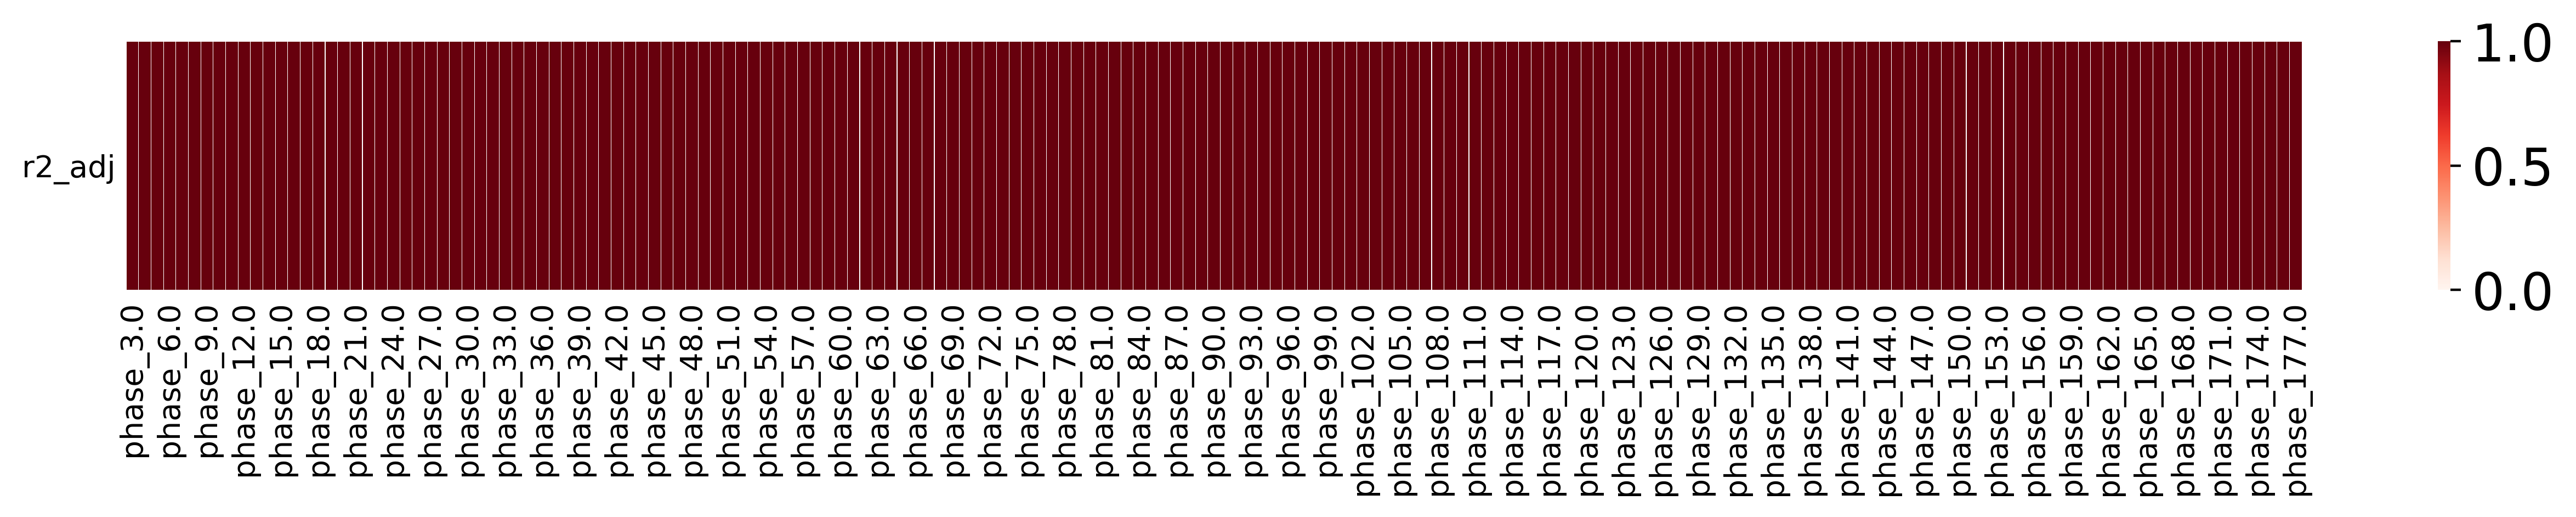

In [156]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(pd.DataFrame(r2_adj_T, columns = ['r2_adj']).T,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_model_r2_adj.jpg')


## Relative Errors

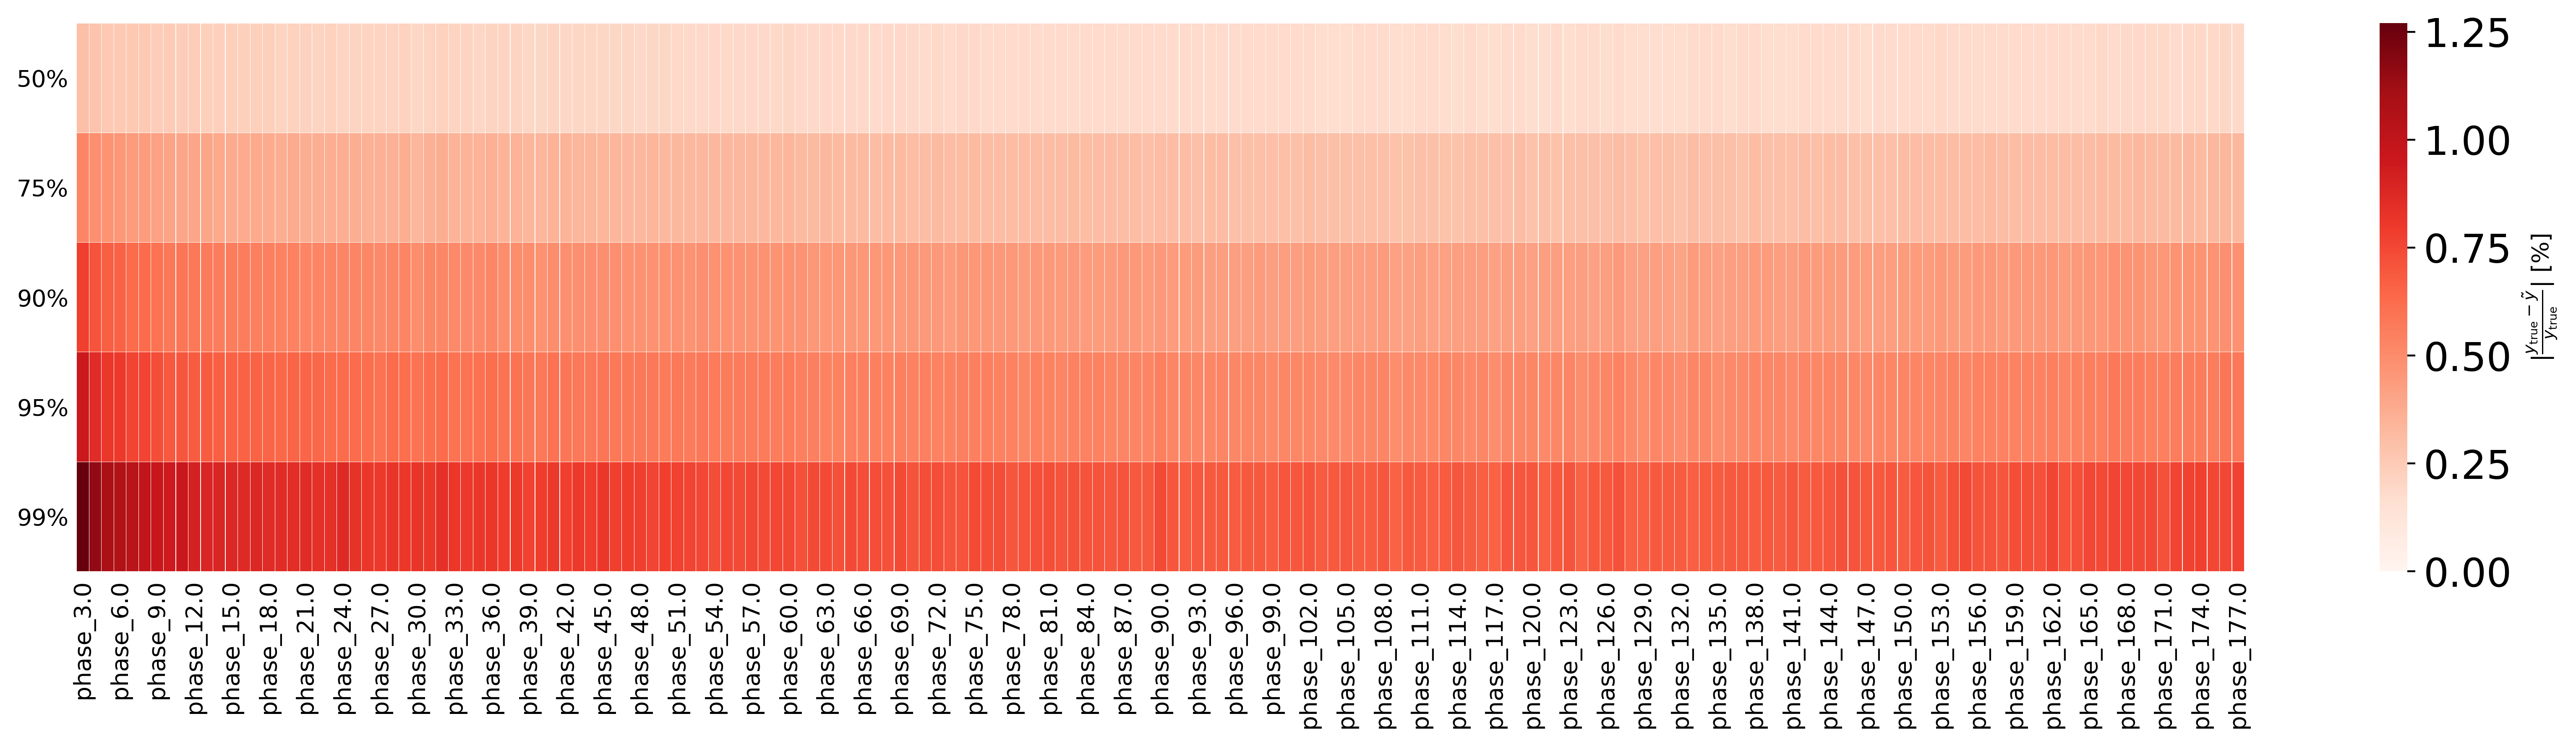

In [157]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table,
            cmap='Reds',
            #annot=True,
            linewidths=0.02,
            vmin=0.,
            vmax=np.max(rel_error_table.max()),
            #annot_kws={'fontsize': 10},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=10);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/isodar_forward_rel_error_percentiles.jpg')

## DVARs vs. percentage errors

In [158]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/percentage_error_vs_{design_var}.jpg')
    
    return fig

In [159]:
qoi.columns[0:11]

Index(['phase_3.0', 'phase_4.0', 'phase_5.0', 'phase_6.0', 'phase_7.0',
       'phase_8.0', 'phase_9.0', 'phase_10.0', 'phase_11.0', 'phase_12.0',
       'phase_13.0'],
      dtype='object')

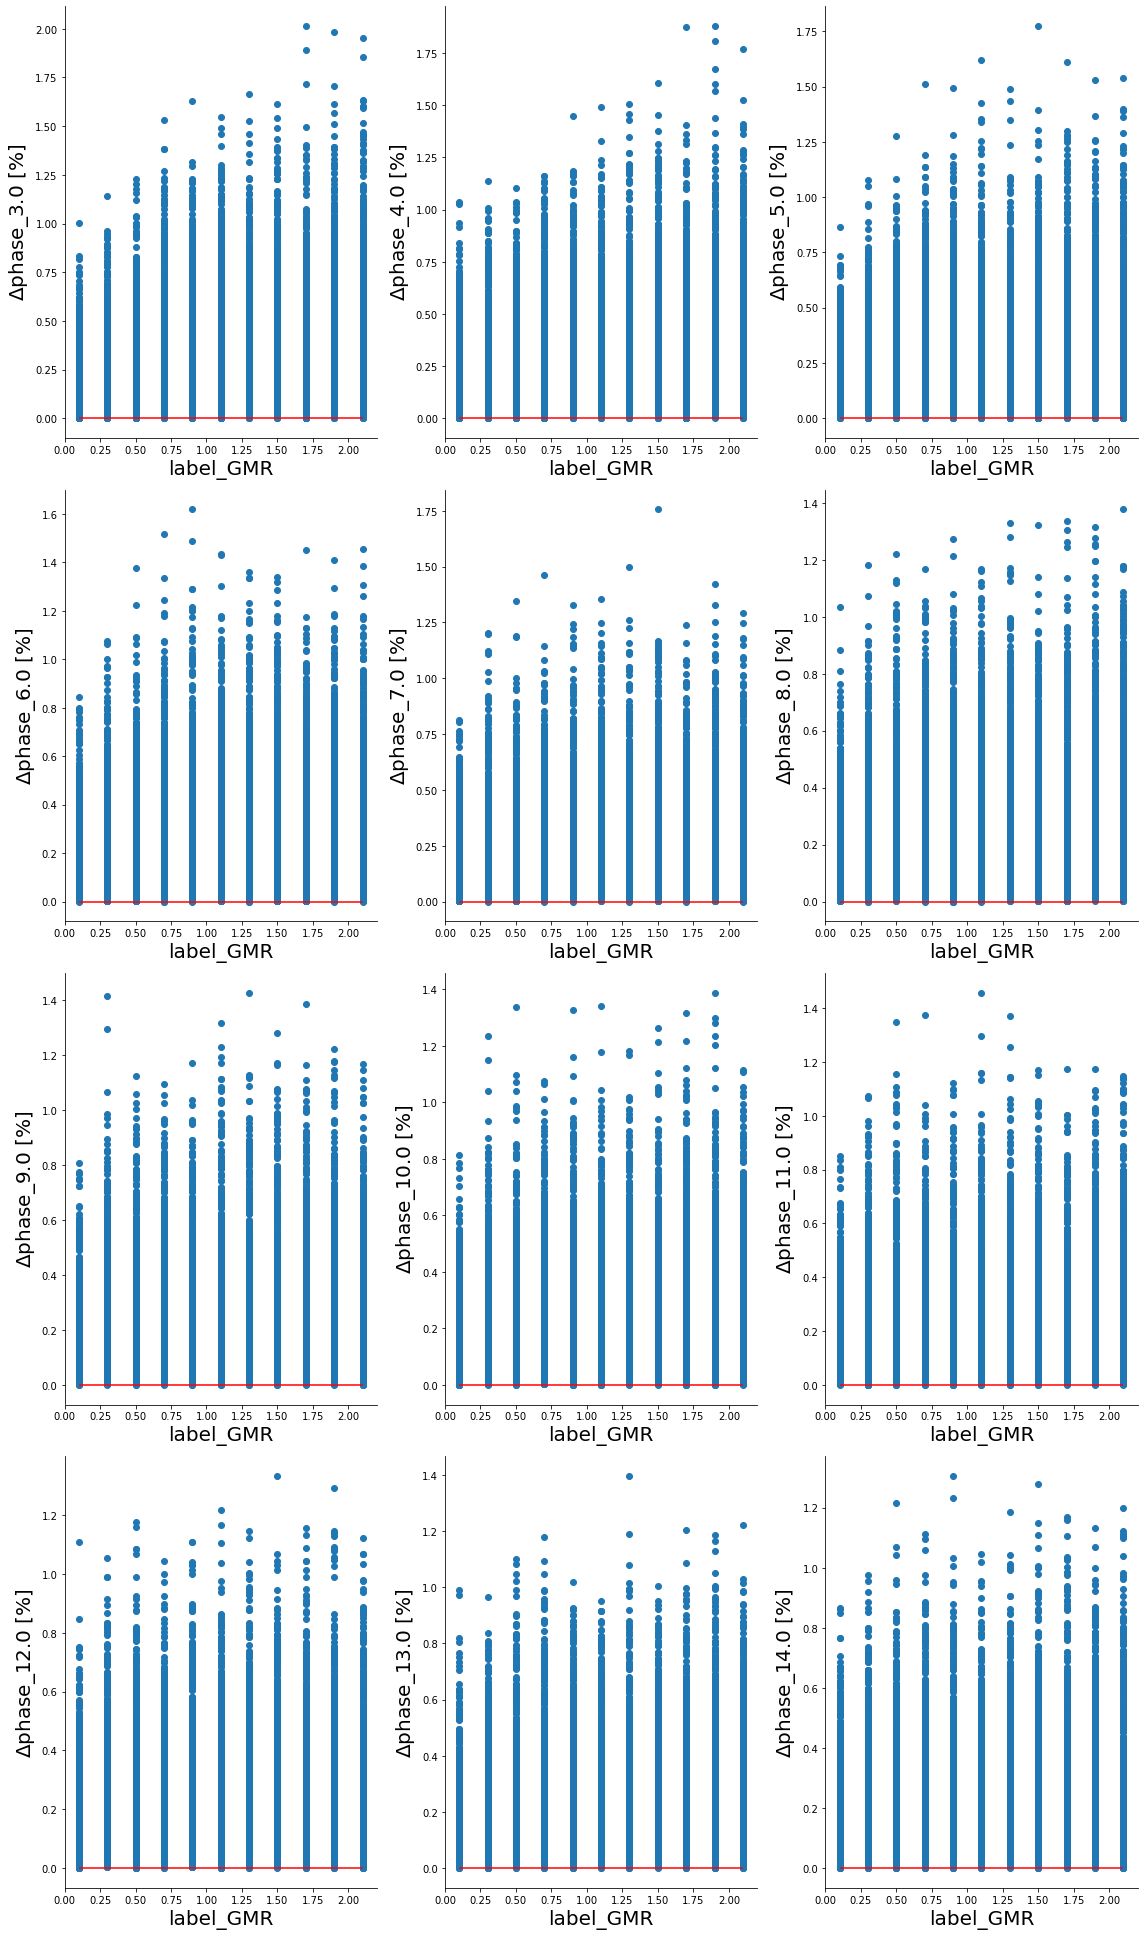

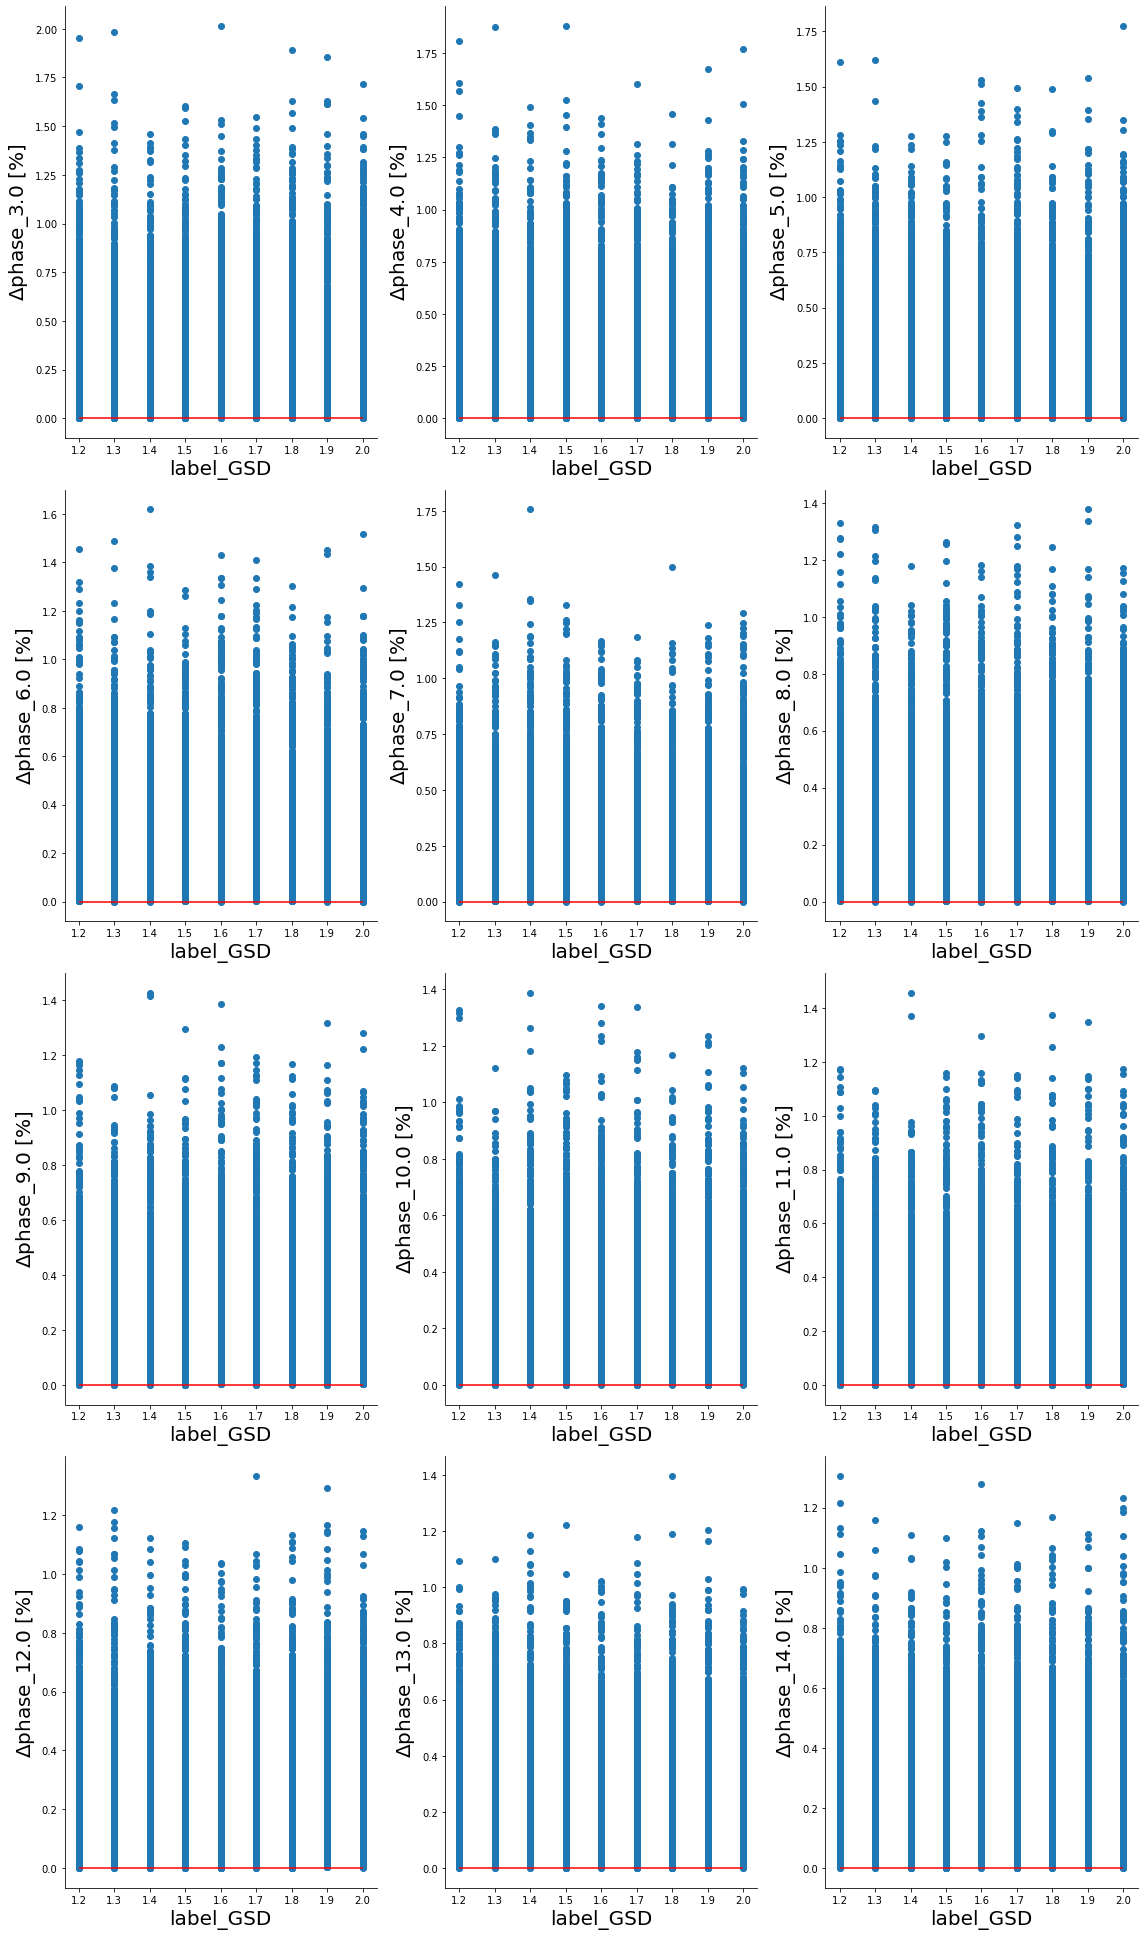

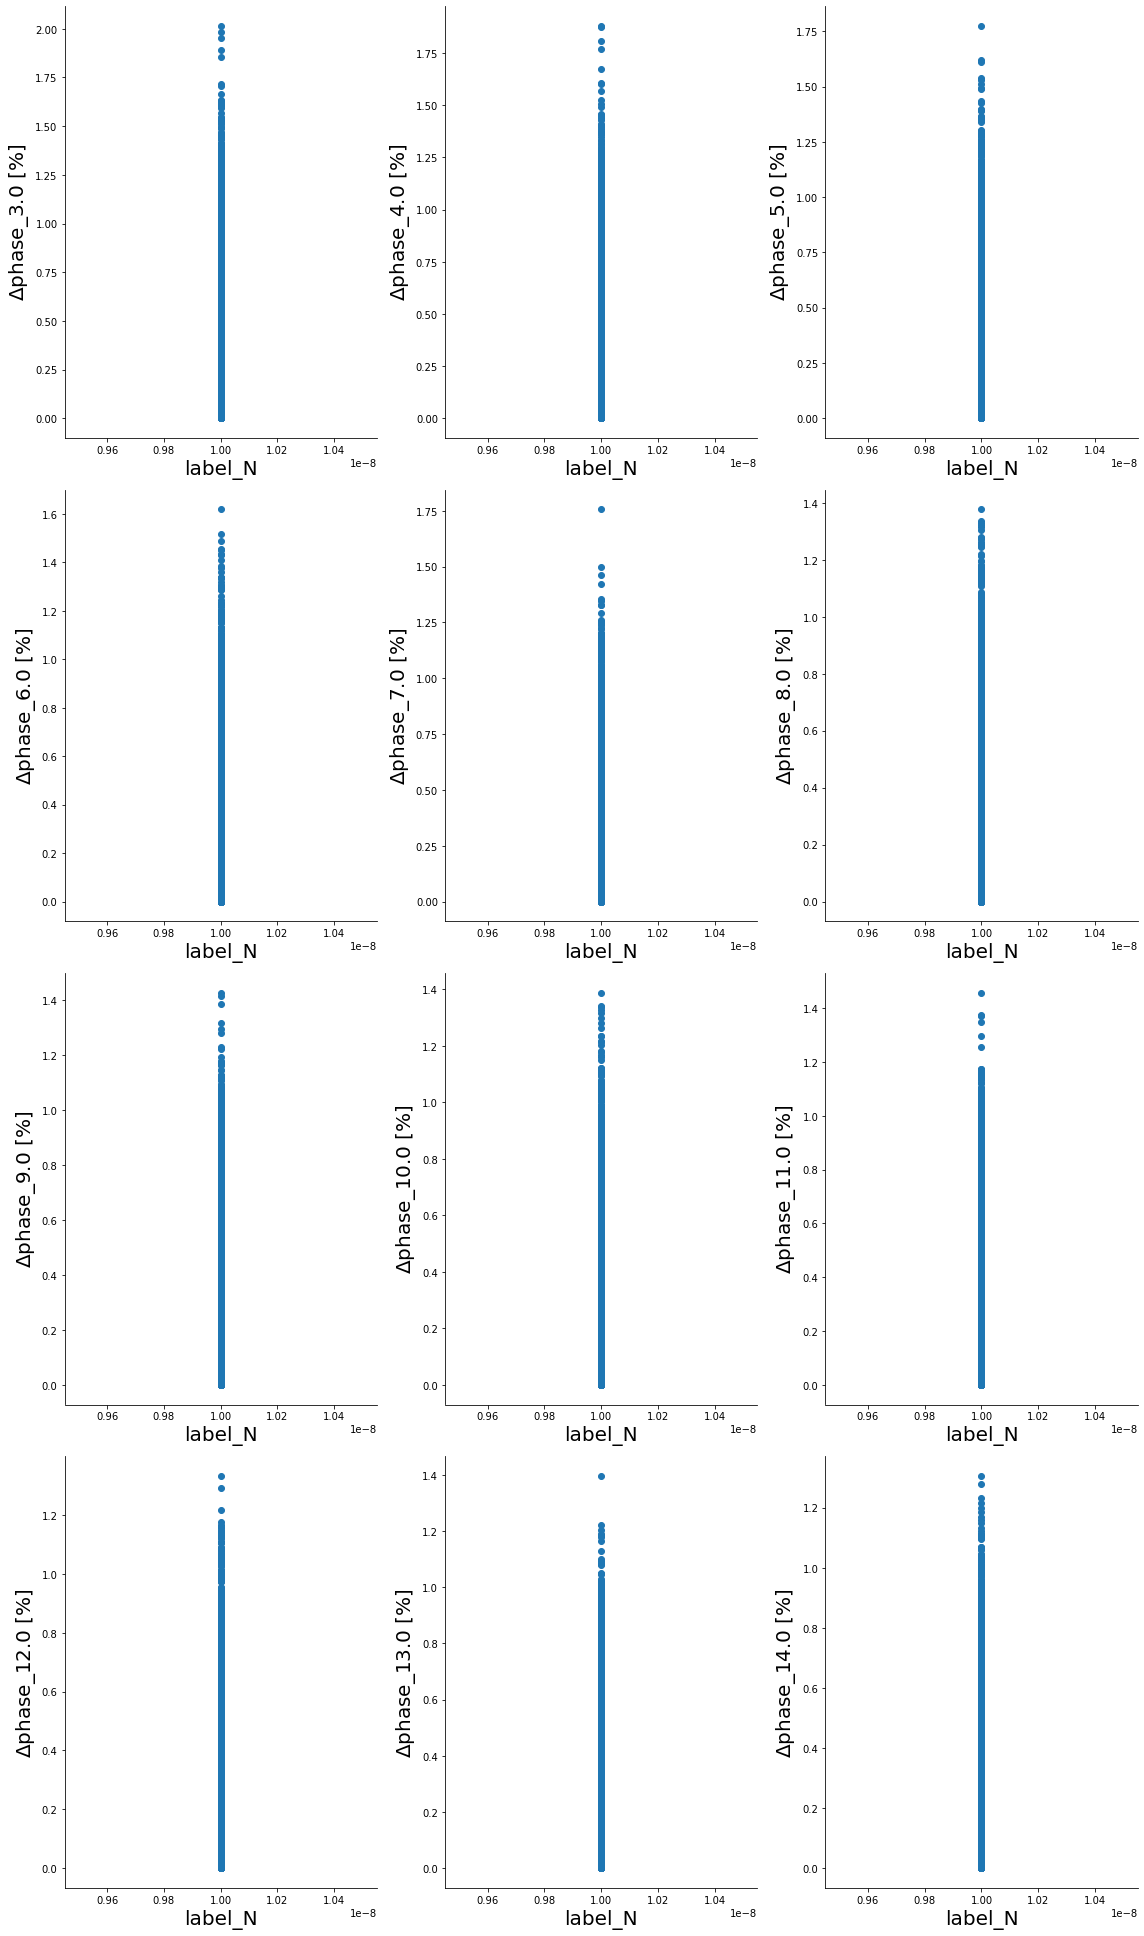

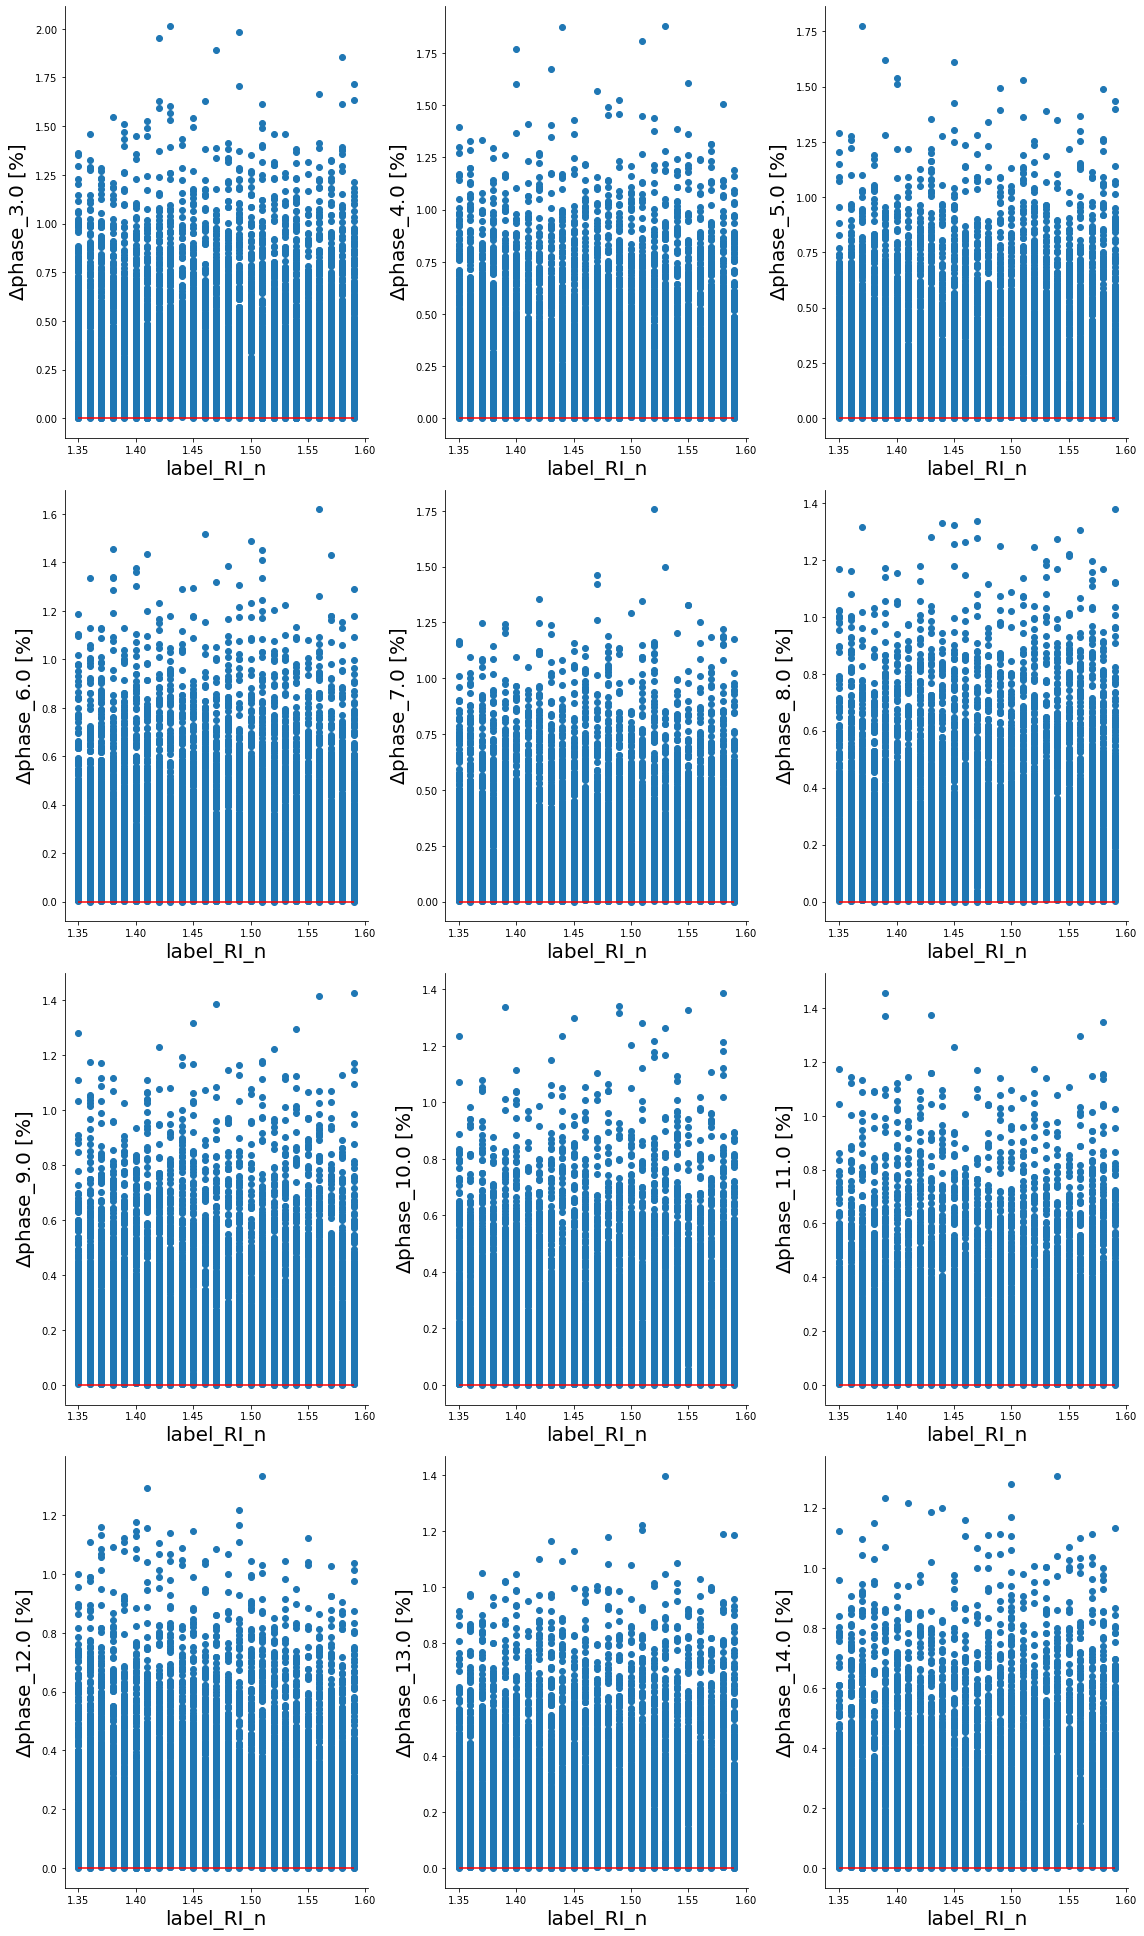

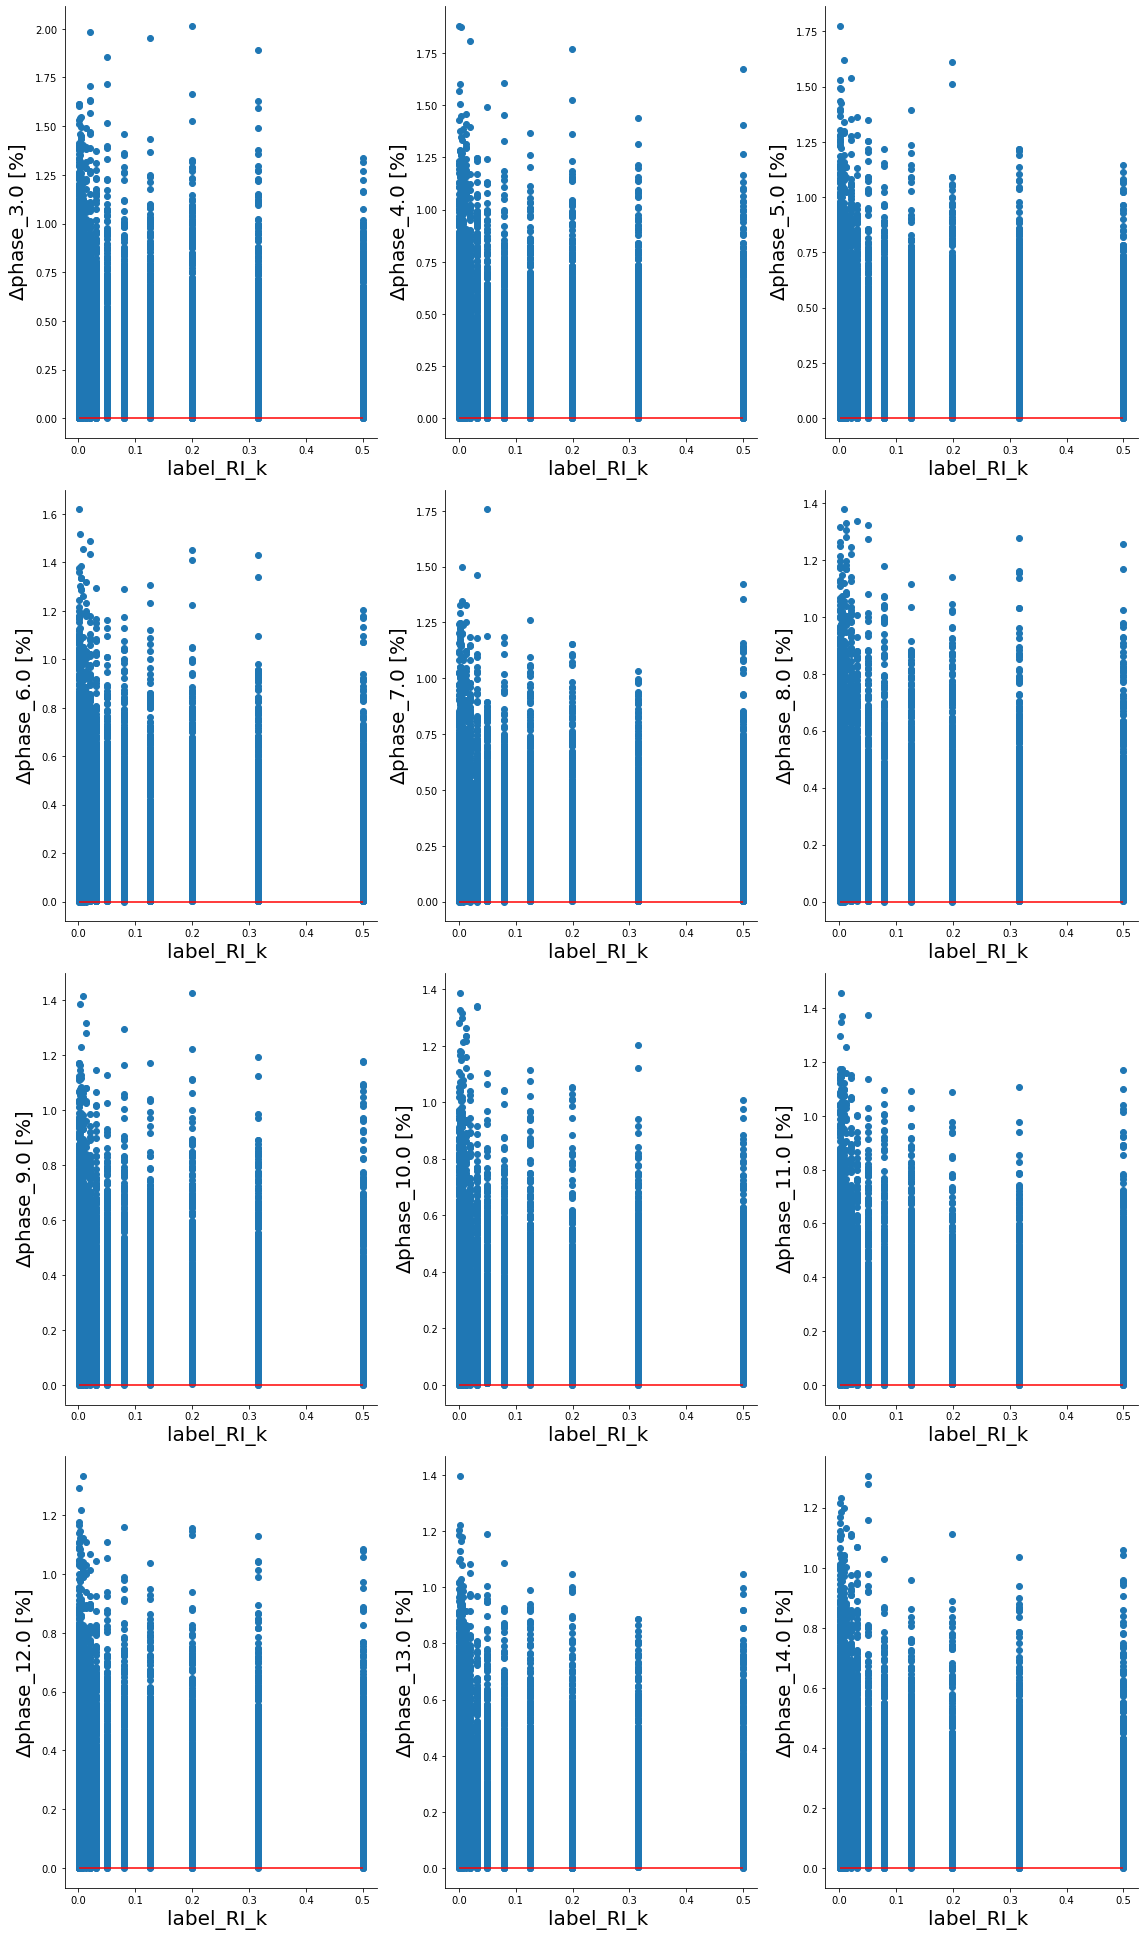

In [160]:
for d in dvar.columns:
    plot_error_vs_dvar(d)

## Correlations between DVARs and QOIs

In [161]:
combined = pd.concat([dvar_test, rel_error], axis=1)

In [162]:
corr = np.round(combined.corr(), decimals=2)

In [163]:
to_plot = corr.copy()
to_plot.drop(columns=dvar.columns, inplace=True)
#to_plot.rename(columns=qoi.columns, index=qoi.columns.values, inplace=True)

In [164]:
qoi.columns

Index(['phase_3.0', 'phase_4.0', 'phase_5.0', 'phase_6.0', 'phase_7.0',
       'phase_8.0', 'phase_9.0', 'phase_10.0', 'phase_11.0', 'phase_12.0',
       ...
       'phase_168.0', 'phase_169.0', 'phase_170.0', 'phase_171.0',
       'phase_172.0', 'phase_173.0', 'phase_174.0', 'phase_175.0',
       'phase_176.0', 'phase_177.0'],
      dtype='object', length=175)

In [165]:
to_plot = to_plot.drop(qoi.columns, axis =0)

In [166]:
to_plot

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
label_GMR         0.23       0.18       0.16       0.13       0.12       0.13   
label_GSD         0.03       0.01       0.02       0.01       0.01       0.01   
label_N           0.00       0.00      -0.00      -0.00      -0.00      -0.00   
label_RI_n        0.01      -0.01       0.00       0.01      -0.00       0.02   
label_RI_k       -0.01      -0.02      -0.01      -0.01       0.01      -0.01   

             phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
label_GMR         0.09        0.12        0.09        0.11  ...         0.11   
label_GSD         0.02        0.02        0.01        0.02  ...        -0.02   
label_N           0.00        0.00       -0.00       -0.00  ...         0.00   
label_RI_n       -0.01        0.01       -0.01       -0.03  ...         0.02   
label_RI_k        0.01       -0.01       -0.03       -0.01  ...        -0.08   

             phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
label_GMR           0.09         0.09         0.10         0.08         0.12   
label_GSD          -0.01         0.00         0.01        -0.00        -0.00   
label_N             0.00        -0.00         0.00        -0.00         0.00   
label_RI_n          0.02         0.02         0.02         0.04         0.02   
label_RI_k         -0.06        -0.06        -0.06        -0.08        -0.07   

             phase_174.0  phase_175.0  phase_176.0  phase_177.0  
label_GMR           0.11         0.09         0.12         0.11  
label_GSD           0.04         0.03         0.00         0.03  
label_N            -0.00        -0.00         0.00         0.00  
label_RI_n          0.03         0.03         0.02         0.04  
label_RI_k         -0.05        -0.07        -0.10        -0.07  

[5 rows x 175 columns]

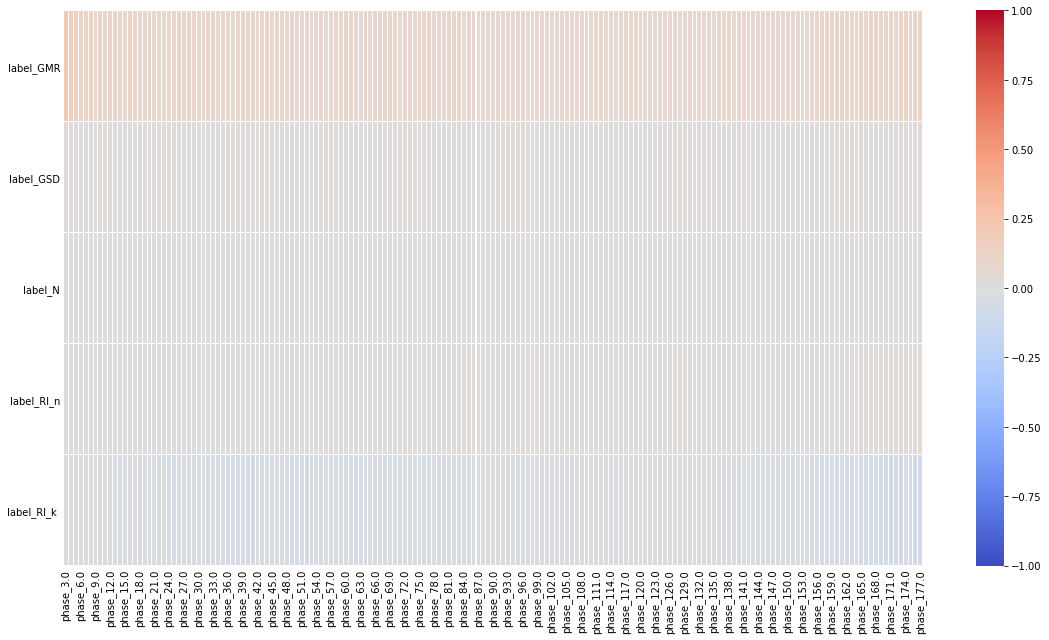

In [167]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
            linewidths=0.01,
           # annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/rel_error_correlations.jpg')

## Residuals

In [168]:
error


phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0     -0.015900  -0.046027   0.072964  -0.070693  -0.020007   0.033096   
1     -0.069522   0.027810  -0.000645  -0.036076  -0.005402  -0.083391   
2     -0.046784   0.058934  -0.055795   0.031103   0.110895  -0.009125   
3      0.033341  -0.014158   0.002141  -0.012955  -0.068206   0.064076   
4     -0.008629  -0.034240  -0.071467  -0.016175   0.004521  -0.113746   
...         ...        ...        ...        ...        ...        ...   
7915  -0.046809  -0.038331  -0.080898   0.037551   0.019629   0.052240   
7916  -0.032274  -0.048976   0.054086   0.025760  -0.026775  -0.054686   
7917  -0.029408  -0.044384  -0.011444   0.037650  -0.064112  -0.029318   
7918  -0.061590   0.080941  -0.084248  -0.130796   0.047588   0.022399   
7919  -0.004258   0.061260  -0.003280   0.012385   0.091919  -0.005766   

      phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0      0.005027   -0.105061    0.024251   -0.154927  ...    -0.061225   
1      0.052590    0.115258    0.028328   -0.049761  ...     0.033522   
2      0.024129   -0.031418    0.037444   -0.049391  ...    -0.002261   
3     -0.014454   -0.012573   -0.017553    0.010726  ...    -0.033883   
4     -0.053999    0.060391   -0.051691   -0.076433  ...     0.004740   
...         ...         ...         ...         ...  ...          ...   
7915   0.059439   -0.026561   -0.016582   -0.004472  ...    -0.002315   
7916   0.014421   -0.018515    0.032557   -0.089791  ...     0.010128   
7917  -0.013850   -0.033208   -0.027386    0.007961  ...    -0.091183   
7918  -0.009361    0.067366    0.099273   -0.006902  ...    -0.074971   
7919   0.056501    0.041686    0.084255   -0.074290  ...     0.126695   

      phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0        0.142000     0.011499     0.101744     0.072447    -0.004894   
1       -0.003357    -0.011323    -0.087884     0.024906     0.030917   
2       -0.010702     0.040539     0.013705     0.021568    -0.049744   
3        0.025512     0.016283     0.025865     0.041174    -0.076305   
4       -0.097424     0.003430     0.015577    -0.006293     0.067323   
...           ...          ...          ...          ...          ...   
7915     0.026177     0.007449     0.072961     0.034709     0.049245   
7916     0.017256     0.029789     0.087857     0.033624     0.011345   
7917     0.006881     0.012397    -0.006028     0.030931     0.018606   
7918     0.011980    -0.008693     0.083839    -0.035184    -0.020398   
7919     0.069281     0.032998     0.035224     0.006010     0.054438   

      phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0       -0.052206     0.019005    -0.041388    -0.056427  
1        0.096380     0.099489    -0.006105     0.057933  
2       -0.058762    -0.006288     0.008329    -0.121722  
3        0.051870     0.016545     0.012540     0.041081  
4       -0.073853    -0.058403    -0.052251    -0.108108  
...           ...          ...          ...          ...  
7915    -0.037927     0.025107    -0.068048    -0.045035  
7916     0.008417     0.044167     0.029054    -0.017329  
7917     0.010300     0.023944     0.032221     0.005794  
7918     0.098696    -0.009282    -0.043434    -0.030790  
7919    -0.042311    -0.016592    -0.029281    -0.076755  

[7920 rows x 175 columns]

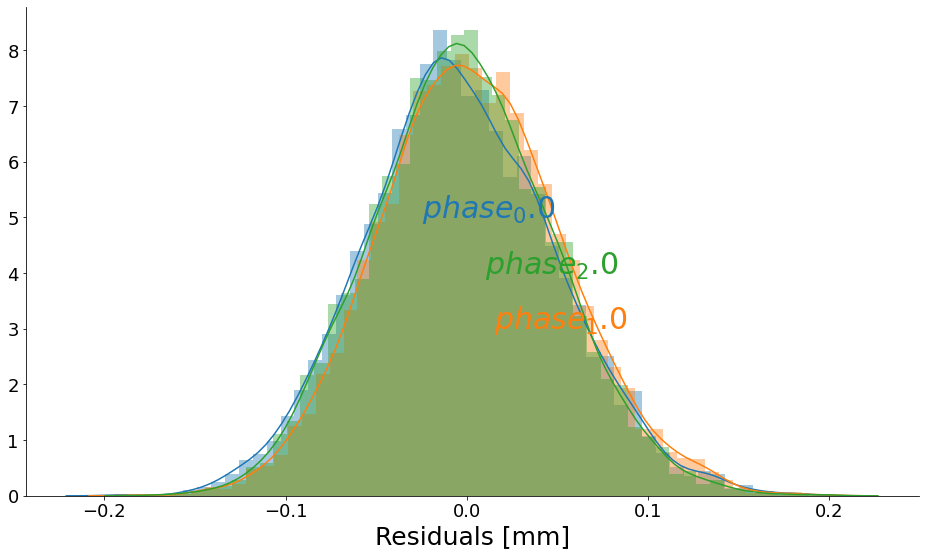

In [169]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in ['phase_3.0', 'phase_4.0', 'phase_5.0']:
    sns.distplot(error[col], ax=ax)
ax.text(x=-0.025,
        y=5,
        color=colors[0],
        s=r'$phase_0.0$',
        fontsize=30)
ax.text(x=0.015,
        y=3,
        color=colors[1],
        s=r'$phase_1.0$',
        fontsize=30)
ax.text(x=0.01,
        y=4,
        color=colors[2],
        s=r'$phase_2.0$',
        fontsize=30)
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/residual_distr_sigma.jpg')

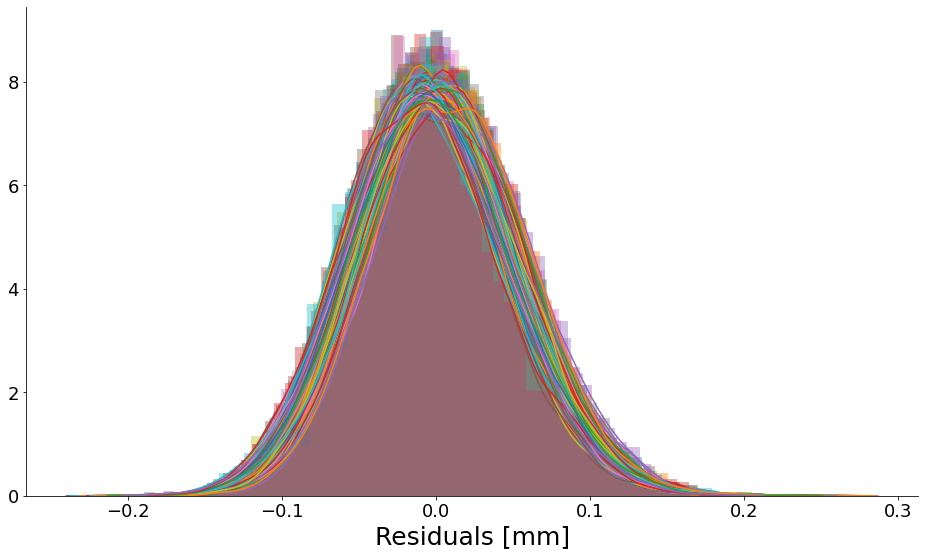

In [170]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in qoi.columns:
    sns.distplot(error[col], ax=ax)
#ax.text(x=-0.025,
#        y=15,
#        color=colors[0],
#        s=r'$\sigma_x$',
#        fontsize=30)
#ax.text(x=0.015,
#        y=30,
#        color=colors[1],
#        s=r'$\sigma_y$',
#        fontsize=30)
#ax.text(x=0.01,
#        y=40,
#        color=colors[2],
#        s=r'$\sigma_z$',
#        fontsize=30)
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/residual_distr_sigma.jpg')

In [171]:
def standardise(x):
    return (x - x.mean()) / x.std()

In [172]:
for i, col in enumerate(qoi.columns[0:11]):
    print(i)
    print(col)

0
phase_3.0
1
phase_4.0
2
phase_5.0
3
phase_6.0
4
phase_7.0
5
phase_8.0
6
phase_9.0
7
phase_10.0
8
phase_11.0
9
phase_12.0
10
phase_13.0


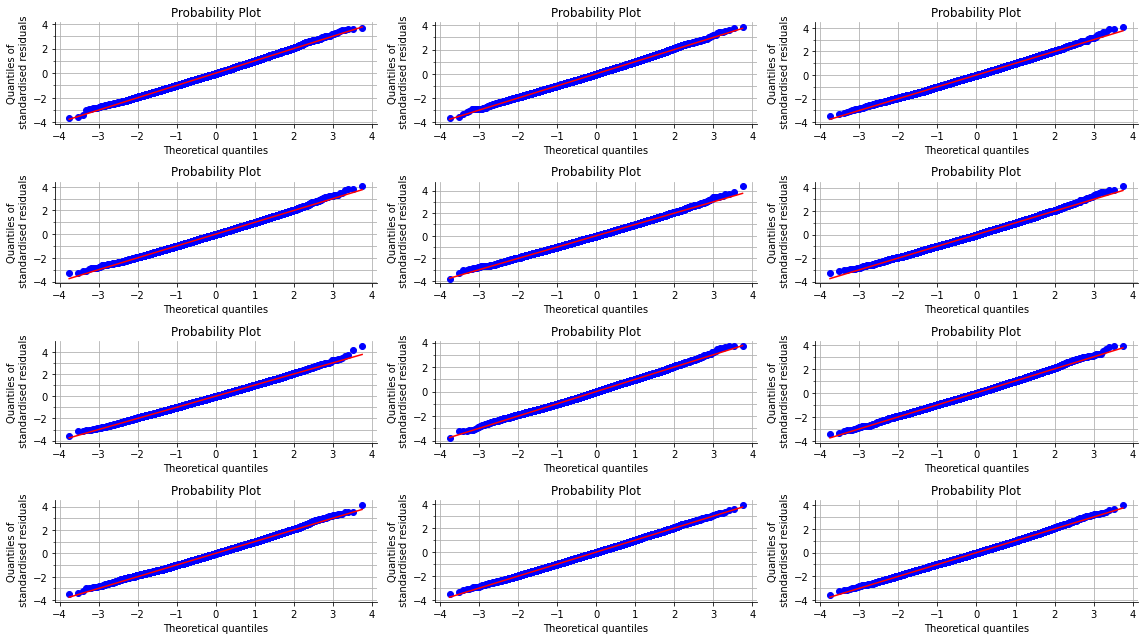

In [173]:
fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error[col]), dist="norm", plot=ax);
#    ax.set_title(qoi.columns[col], fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
fig.savefig(f'{plot_dir}/residual_normality_plots.jpg')

In [174]:
# pd.DataFrame({'Mean': error.mean(axis=0), 'std': error.std(axis=0)})

In [175]:
rel_error.abs().quantile(0.9)

phase_3.0      0.780940
phase_4.0      0.713049
phase_5.0      0.674572
phase_6.0      0.661833
phase_7.0      0.634314
                 ...   
phase_173.0    0.467291
phase_174.0    0.467645
phase_175.0    0.469811
phase_176.0    0.489548
phase_177.0    0.477037
Name: 0.9, Length: 175, dtype: float64

In [176]:
statistic, p = scipy.stats.shapiro(standardise(error['phase_4.0']).values)

/psi/home/boiger_r/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [177]:
p

7.781115527905058e-06

In [178]:
surr.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               960       
_________________________________________________________________
dense_1 (Dense)              (None, 160)               25760     
_________________________________________________________________
dense_2 (Dense)              (None, 160)               25760     
_________________________________________________________________
dense_3 (Dense)              (None, 160)               25760     
_________________________________________________________________
dense_4 (Dense)              (None, 175)               28175     
Total params: 106,415
Trainable params: 106,415
Non-trainable params: 0
_________________________________________________________________


In [179]:
qoi_pred

phase_3.0  phase_4.0  phase_5.0  phase_6.0  phase_7.0  phase_8.0  \
0    -12.119268 -12.495007 -12.858569 -13.192397 -13.508414 -13.790429   
1    -12.554578 -12.806840 -13.083499 -13.344106 -13.596496 -13.831543   
2    -12.917718 -13.010021 -13.114662 -13.247795 -13.396777 -13.572749   
3    -13.221255 -13.434886 -13.625245 -13.814727 -14.016524 -14.213342   
4     -9.924663 -10.529855 -11.166069 -11.751029 -12.297113 -12.775459   
...         ...        ...        ...        ...        ...        ...   
7915 -15.498467 -15.528639 -15.567271 -15.628345 -15.706724 -15.798802   
7916 -10.229145 -10.859527 -11.436170 -11.922691 -12.350320 -12.737398   
7917 -19.666533 -19.658683 -19.671310 -19.685017 -19.701725 -19.728526   
7918 -12.691877 -12.810281 -12.957787 -13.120698 -13.304237 -13.535488   
7919  -9.748859 -10.502283 -11.146450 -11.645021 -12.076567 -12.430454   

      phase_9.0  phase_10.0  phase_11.0  phase_12.0  ...  phase_168.0  \
0    -14.043931  -14.264144  -14.471393  -14.666834  ...   -17.700425   
1    -14.045234  -14.244897  -14.428791  -14.610105  ...   -17.658459   
2    -13.737162  -13.932287  -14.143620  -14.362805  ...   -17.137880   
3    -14.426437  -14.642391  -14.871195  -15.076268  ...   -21.408680   
4    -13.195223  -13.508878  -13.805219  -14.088782  ...   -18.584913   
...         ...         ...         ...         ...  ...          ...   
7915 -15.896053  -15.971215  -16.067772  -16.162329  ...   -22.347431   
7916 -13.030115  -13.285604  -13.495566  -13.701931  ...   -16.544123   
7917 -19.740191  -19.743146  -19.762613  -19.769654  ...   -23.870190   
7918 -13.741221  -13.974878  -14.211661  -14.461412  ...   -17.999747   
7919 -12.701450  -12.936937  -13.118841  -13.279128  ...   -16.634037   

      phase_169.0  phase_170.0  phase_171.0  phase_172.0  phase_173.0  \
0      -17.702036   -17.692262   -17.694424   -17.679975   -17.681838   
1      -17.695004   -17.715089   -17.744899   -17.775008   -17.802867   
2      -17.131810   -17.097342   -17.038245   -16.973960   -16.878570   
3      -21.407888   -21.408559   -21.408939   -21.402882   -21.407264   
4      -18.581779   -18.584388   -18.573722   -18.580118   -18.585706   
...           ...          ...          ...          ...          ...   
7915   -22.347437   -22.325091   -22.317780   -22.313809   -22.322452   
7916   -16.505416   -16.444113   -16.388246   -16.309543   -16.262089   
7917   -23.852580   -23.835541   -23.832297   -23.838790   -23.839054   
7918   -18.058036   -18.134525   -18.187950   -18.236831   -18.263221   
7919   -16.574840   -16.507619   -16.449645   -16.353244   -16.279043   

      phase_174.0  phase_175.0  phase_176.0  phase_177.0  
0      -17.658158   -17.678629   -17.710386   -17.723420  
1      -17.799101   -17.815132   -17.823402   -17.792195  
2      -16.759343   -16.660736   -16.553708   -16.460921  
3      -21.407362   -21.407926   -21.399895   -21.397470  
4      -18.579800   -18.602255   -18.611545   -18.601368  
...           ...          ...          ...          ...  
7915   -22.333991   -22.345755   -22.352056   -22.343892  
7916   -16.183207   -16.192009   -16.235746   -16.332433  
7917   -23.832796   -23.845853   -23.846602   -23.847221  
7918   -18.223973   -18.161082   -18.062163   -17.958986  
7919   -16.151060   -16.095146   -16.069633   -16.123351  

[7920 rows x 175 columns]

In [180]:
test_index = qoi_test.index.tolist()
test_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [181]:
presentation_plot_index = [0,1,3,4,5,6]

qoi_test.index.values

array([   0,    1,    2, ..., 7917, 7918, 7919])

No handles with labels found to put in legend.


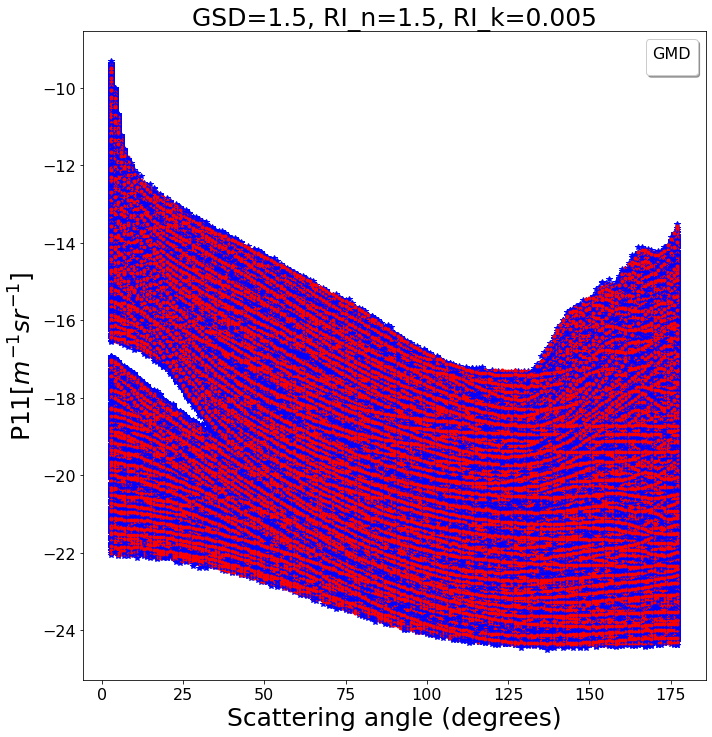

In [182]:
fig, ax = plt.subplots(figsize = (10,10))
for index in qoi_test.index.values:
    ax.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title('GSD=1.5, RI_n=1.5, RI_k=0.005',fontsize = 25)
#fig.align_labels()
ax.legend(loc='upper right', shadow=True,title='GMD', fontsize=16)
ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_all.jpg')

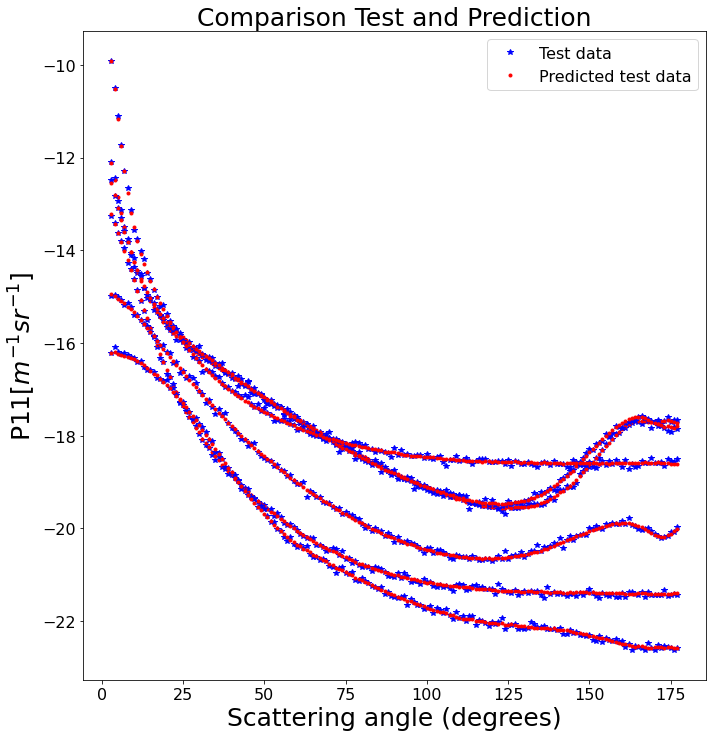

In [183]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    plot_test_data = ax.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = ax.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.legend(loc='upper right', shadow=True,title='GMD', fontsize=16)
ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result.jpg')

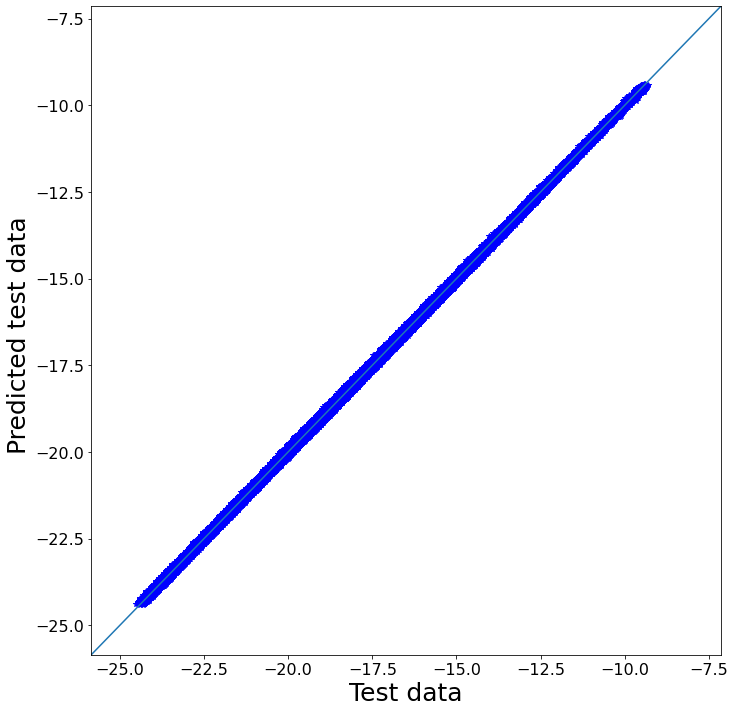

In [184]:
fig, ax = plt.subplots(figsize = (10,10))
for index in qoi_test.index.values:
    ax.plot(qoi_test.iloc[index],qoi_pred.iloc[index],'b*')
    
    #plt.yscale('logit')
    
    
ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 

ax.axline([-25, -25], [-8, -8])


#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation.jpg')

In [185]:
from keras.utils.vis_utils import plot_model

In [186]:
plot_dir

'/data/user/boiger_r/aerosol/aerosol_results/forward_model_phase_noise_small0/plots/model'

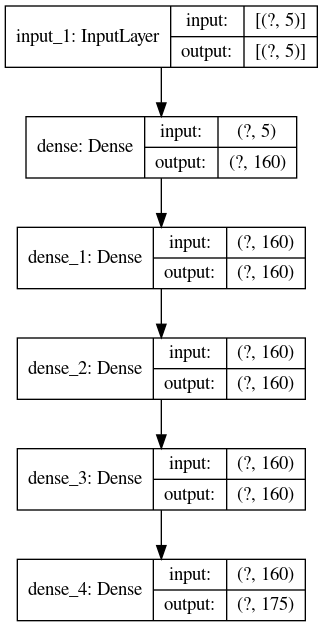

In [187]:
plot_model(surr.model, show_shapes=True,show_layer_names=True, to_file = f'{plot_dir}/model_architecture.png')


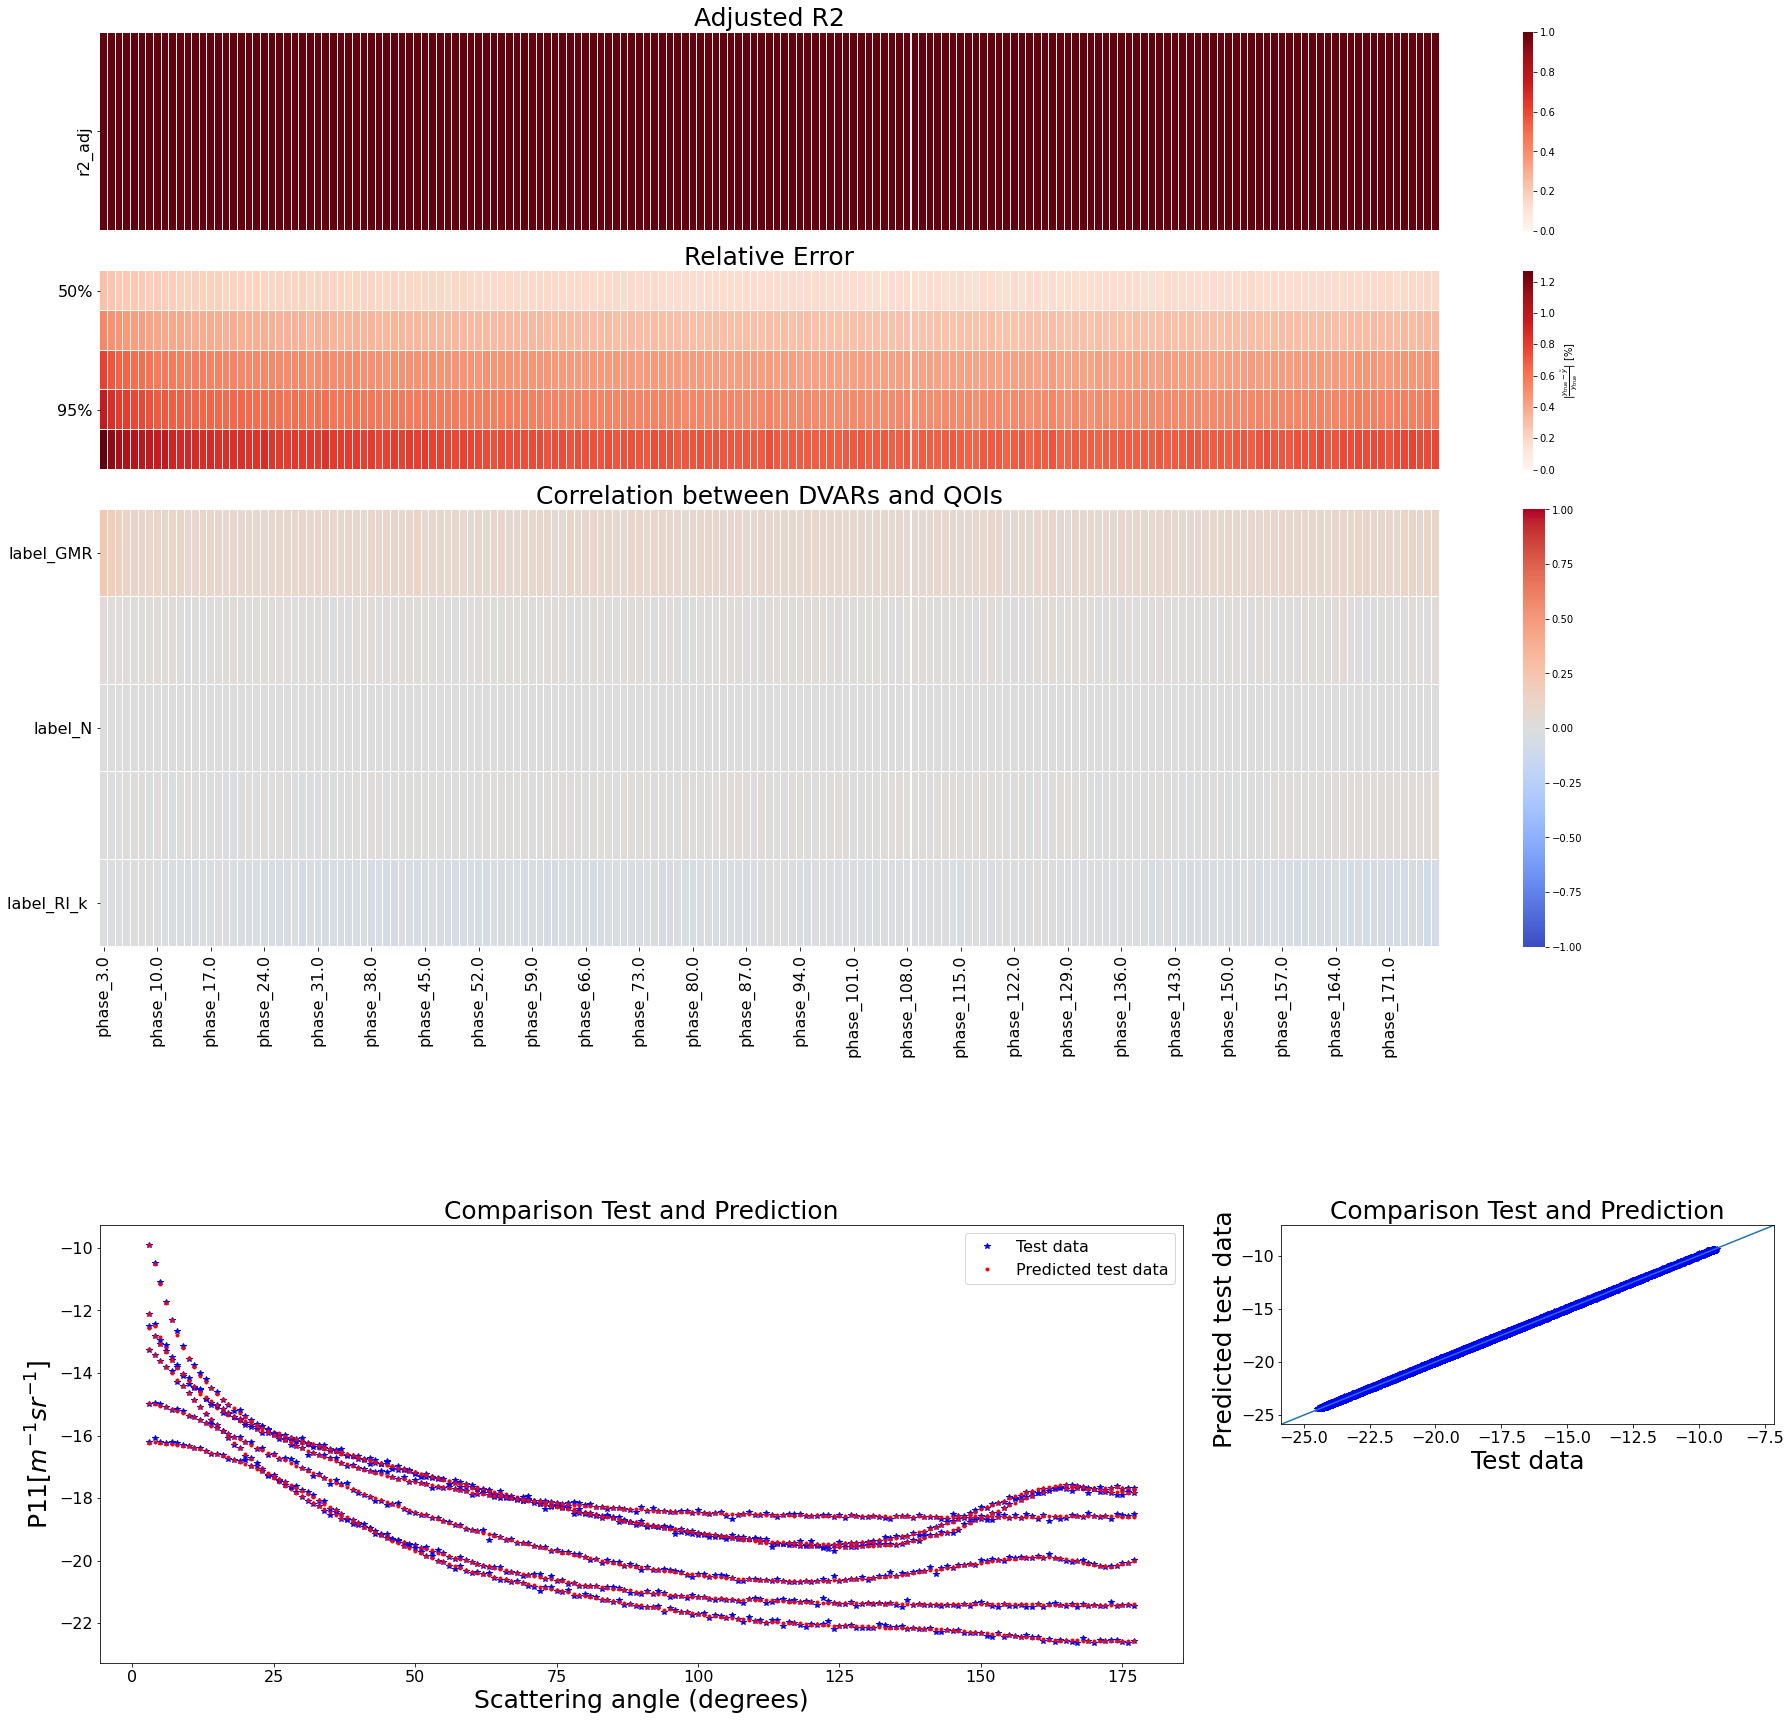

In [188]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(pd.DataFrame(r2_adj_T, columns = ['r2_adj']).T,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred.columns)+3),qoi_pred.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_forward_model.jpg')
